<a href="https://colab.research.google.com/github/BACKGORUND/Latihan/blob/main/Big_Data_Azhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/DianCA26/Dataset/main/dataset_sms_spam%20_v1.csv',sep=",")

In [ ]:
df.shape

(1143, 2)

In [ ]:
df.tail()

,Teks,label
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0
1142,No bri atas nama kamu mana,0


In [ ]:
df['Ket'] = df.label.map({1:'Spam',2:'Spam',0:'Bukan Spam'})
df['label'] = df.Ket.map({'Spam':1,'Bukan Spam':0})

In [ ]:
df.sample(10)

,Teks,label,Ket
452,PROMO LEBARAN.Paket Service Motor+Olie HANYA 3...,1,Spam
29,Bebas Pulsa! Ambil bonusmu di *600# (GRATIS). ...,1,Spam
828,"Jadinya mau apa sok, sebagian dari uang kas? K...",0,Bukan Spam
131,Mau Pergi Dari Hatiku nya Aliando di HP kamu? ...,1,Spam
149,Nikmati EXTRA 2GB 4G LTE + EXTRA voucher belan...,1,Spam
77,"Hallo urang minang, ado sticker rancak di Grou...",1,Spam
46,cuma Rp 7500 dapat nelpon dan SMS UNLIMITED ke...,1,Spam
734,Dimulai dari angka 0,0,Bukan Spam
949,"nama1 aku lg ngerjain tes ngoding di upi net, ...",0,Bukan Spam
866,Kalo udah ad progres besok aja jam 2an kesini..,0,Bukan Spam


In [ ]:
df.shape

(1143, 3)

DATA CLEANING
```
# Untuk Membersihkan Data
```



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teks    1143 non-null   object
 1   label   1143 non-null   int64 
 2   Ket     1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [ ]:
#Missing Value
df.isnull().sum()

Teks     0
label    0
Ket      0
dtype: int64

In [ ]:
df.sample(5)

,Teks,label,Ket
35,BONUS KUOTA 500MB (1hr)! Cukup isi ulang min. ...,1,Spam
965,Oke kalau untuk dp harus berapa%?,0,Bukan Spam
899,Maaf kaprodi kita itu siapa yah hehe,0,Bukan Spam
1132,"yaudah, minta data dummy untuk diagnosa_pasien...",0,Bukan Spam
750,"Engga teh aku udh siap, mau brgkt ini. Aku td ...",0,Bukan Spam


In [ ]:
df.isnull().sum()

Teks     0
label    0
Ket      0
dtype: int64

In [ ]:
#Check Data Duplikat
df.duplicated().sum()

1

In [ ]:
#Membuang Data DUplikat
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1142, 3)

ANALISIS DATA EKSPLORATIF

In [ ]:
df['label'].value_counts()

1    574
0    568
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

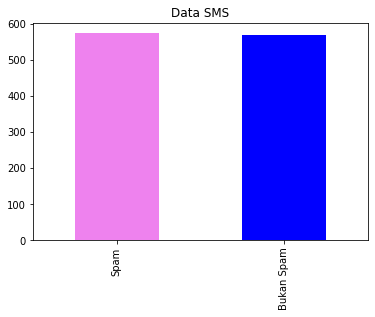

In [ ]:
count_Class=pd.value_counts(df["Ket"], sort= True)
count_Class.plot(kind= 'bar', color= ["violet", "blue"])
plt.title('Data SMS')
plt.show()

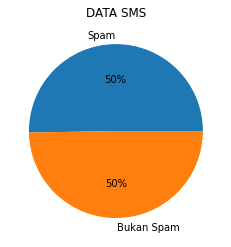

In [ ]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('DATA SMS')
plt.ylabel('')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Jumlah_Huruf'] = df['Teks'].apply(len)

In [ ]:
df['Jumlah_Kata'] = df['Teks'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['Jumlah_Kalimat'] = df['Teks'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Teks,label,Ket,Jumlah_Huruf,Jumlah_Kata,Jumlah_Kalimat
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,1,Spam,153,32,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,1,Spam,152,34,4
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",1,Spam,152,29,2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",1,Spam,153,29,2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,1,Spam,113,25,3


In [ ]:
df[['Jumlah_Huruf','Jumlah_Kata','Jumlah_Kalimat']].describe()

,Jumlah_Huruf,Jumlah_Kata,Jumlah_Kalimat
count,1142.000000,1142.000000,1142.000000
mean,108.757443,19.957093,1.802102
std,59.098470,10.487123,1.125466
min,13.000000,3.000000,1.000000
25%,58.000000,11.000000,1.000000
50%,113.000000,20.000000,1.000000
75%,152.000000,26.000000,2.000000
max,434.000000,83.000000,11.000000


In [ ]:
df[df['Ket']=='Spam'][['Jumlah_Huruf','Jumlah_Kata','Jumlah_Kalimat']].describe()

,Jumlah_Huruf,Jumlah_Kata,Jumlah_Kalimat
count,574.000000,574.000000,574.000000
mean,146.595819,26.029617,2.132404
std,44.191915,8.504028,1.264316
min,46.000000,7.000000,1.000000
25%,129.000000,21.000000,1.000000
50%,149.000000,25.000000,2.000000
75%,158.000000,30.000000,3.000000
max,431.000000,83.000000,8.000000


In [ ]:
df[df['Ket']=='Bukan Spam'][['Jumlah_Huruf','Jumlah_Kata','Jumlah_Kalimat']].describe()

,Jumlah_Huruf,Jumlah_Kata,Jumlah_Kalimat
count,568.000000,568.000000,568.000000
mean,70.519366,13.820423,1.468310
std,46.267030,8.554389,0.843514
min,13.000000,3.000000,1.000000
25%,42.000000,8.000000,1.000000
50%,58.500000,12.000000,1.000000
75%,83.250000,17.000000,2.000000
max,434.000000,73.000000,11.000000


In [ ]:
import seaborn as sns

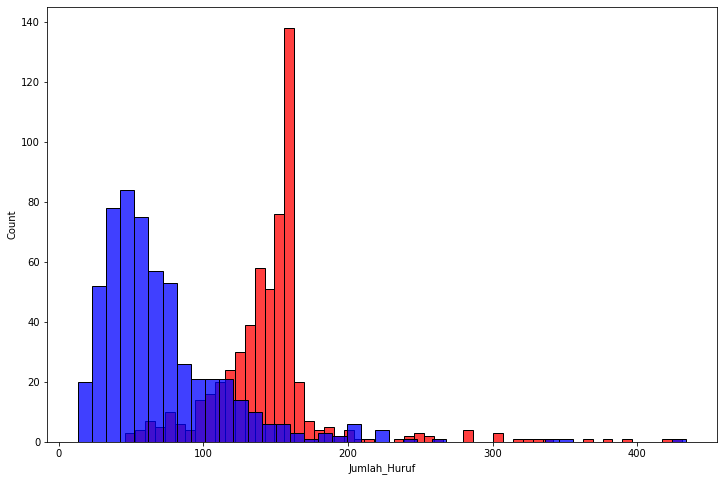

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Ket']=='Spam']['Jumlah_Huruf'], color='Red')
sns.histplot(df[df['Ket']=='Bukan Spam']['Jumlah_Huruf'], color='Blue')

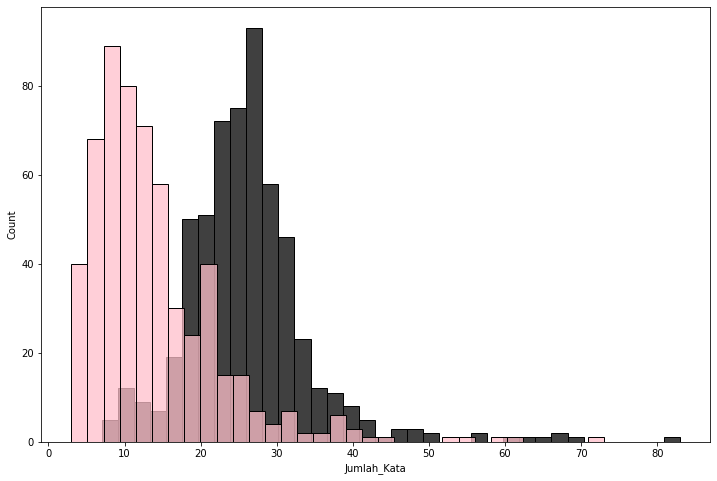

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Ket']=='Spam']['Jumlah_Kata'], color='Black')
sns.histplot(df[df['Ket']=='Bukan Spam']['Jumlah_Kata'], color='Pink')

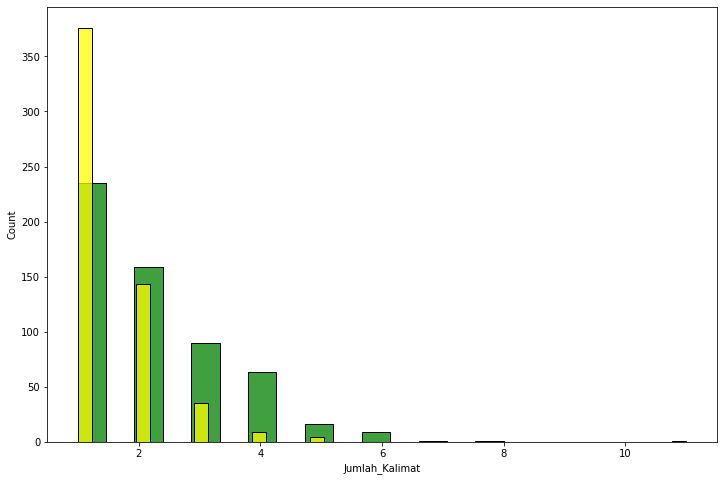

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Ket']=='Spam']['Jumlah_Kalimat'], color='Green')
sns.histplot(df[df['Ket']=='Bukan Spam']['Jumlah_Kalimat'], color='Yellow')

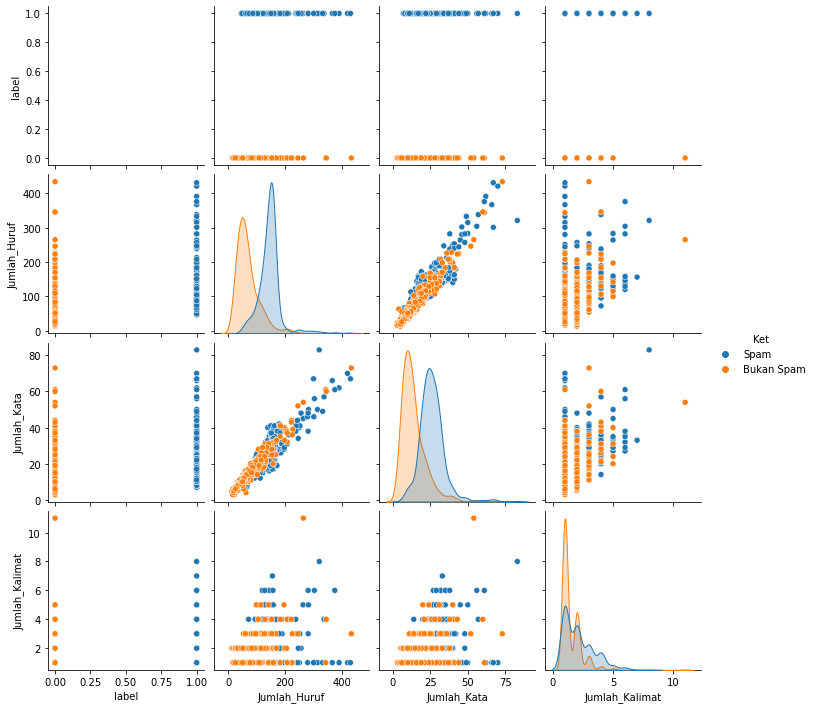

In [ ]:
sns.pairplot(df, hue='Ket')

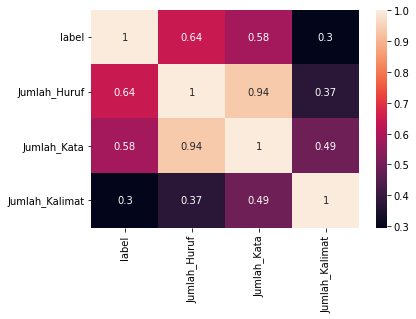

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Tokenize
stopwords.words('indonesian')

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
#Lower Case
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Alhamdulillah')

'alhamdulillah'

In [ ]:
#Special Word
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#function remov, tokenize, lower case, dan special word dan stemming
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y =  []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('indonesian') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ". join(y)

In [ ]:
transform_text('Yeah :) Selesai Programku d')

'yeah selesai programku d'

In [ ]:
#mamsukkan function ke data
df['Transformasi_Teks'] = df['Teks'].apply(transform_text)

EDA data yang sudah di transformasi

> Indented block



In [ ]:
df.sample(5)

,Teks,label,Ket,Jumlah_Huruf,Jumlah_Kata,Jumlah_Kalimat,Transformasi_Teks
990,Paspor di perpanjang bayar nya brp nuy?,0,Bukan Spam,39,8,1,paspor perpanjang bayar nya brp nuy
342,"Kirim ke MANDIRI aja, a/n ARYA. rek: 131-000-7...",1,Spam,76,16,2,kirim mandiri aja arya rek klo kabarin ya
733,Dilantai 2 ya tepat diruang skripsi,0,Bukan Spam,35,6,1,dilantai 2 ya diruang skripsi
641,"assalamualaikum pak, mohon maaf saya mau tanya...",0,Bukan Spam,137,26,3,assalamualaikum mohon maaf remedi dwm hadir on...
403,Pelanggan Yth. TRI CARE No.XV/2015 PIN_PEMENAN...,1,Spam,179,28,4,pelanggan yth tri care 8jf2177 hadiah 1 unit m...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=20, background_color='white')

In [ ]:
spam_wc1 = wc.generate(df[df['label']==1]['Transformasi_Teks'].str.cat(sep=' '))

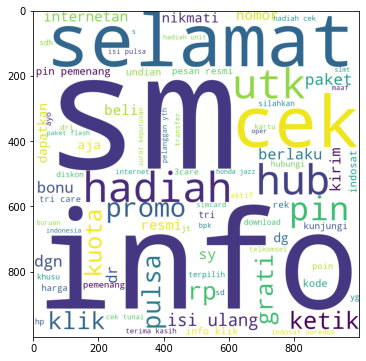

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc1)

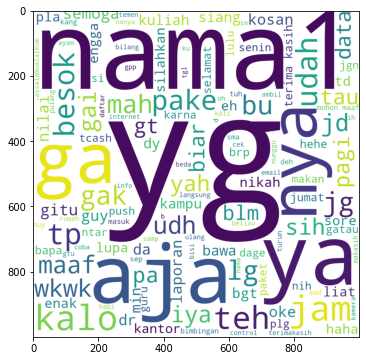

In [ ]:
spam_wc2 = wc.generate(df[df['label']==0]['Transformasi_Teks'].str.cat(sep=' '))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc2)

In [ ]:
spam_corpus = []
for msg in df[df['label']==1]['Transformasi_Teks'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

8829

In [ ]:
from collections import Counter

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


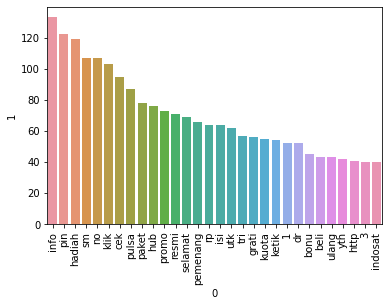

In [ ]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
privasi_corpus = []
for msg in df[df['label']==0]['Transformasi_Teks'].tolist():
    for word in msg.split():
        privasi_corpus.append(word)
len(privasi_corpus)

4560

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


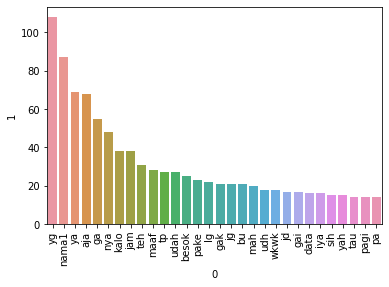

In [ ]:
sns.barplot(pd.DataFrame(Counter(privasi_corpus).most_common(30))[0],pd.DataFrame(Counter(privasi_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.tail()

,Teks,label,Ket,Jumlah_Huruf,Jumlah_Kata,Jumlah_Kalimat,Transformasi_Teks
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,Bukan Spam,46,10,1,yooo sama2 oke umumin grup kela
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,Bukan Spam,52,10,2,ga ad nuli kerudung kirain warna jin
1140,Mba mau kirim 300 ya,0,Bukan Spam,20,5,1,mba kirim 300 ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,Bukan Spam,51,10,1,nama1 beaok bwrangkat pagi ca atay tranfer
1142,No bri atas nama kamu mana,0,Bukan Spam,26,6,1,no bri nama


In [ ]:
#Vectorrizer dan TF_IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['Transformasi_Teks']).toarray()

In [ ]:
X.shape

(1142, 3000)

**MODEL BUILDING**

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = tfidf.fit_transform(df['Transformasi_Teks']).toarray()

In [ ]:
Y = df['label'].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Disini Kita akan menggunakan NAIVE BAYES, RANDOM FOREST, dan LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

Membut Klasifikasi atau Pipeline dengan clfs

In [ ]:
clfs = {
    'NB': mnb,
    'LR': lrc,
    'RF': rfc,
}
classifiers = [mnb,lrc,rfc]
for cls in classifiers:
    cls.fit(X_train, Y_train)
pipe_dict = {0: "Naive Bayes",1:"Logisitc Regresion",2:"Random Forest"}
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,Y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Naive Bayes: 0.951839 
Logisitc Regresion: 0.910225 
Random Forest: 0.948567 


In [ ]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    recall = recall_score(Y_test,Y_pred)
    F1 = f1_score(Y_test,Y_pred)


    return accuracy,precision,recall,F1,

In [ ]:
train_classifier(mnb,X_train,Y_train,X_test,Y_test)

(0.9737991266375546,
 0.9727272727272728,
 0.9727272727272728,
 0.9727272727272728)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,Y_train,X_test,Y_test)

    print("Algoritma Untuk ",name)
    print("Accuracy  =",current_accuracy)
    print("Precision =",current_precision)
    print("Recall    =",current_recall)
    print("F1 Score  =",current_f1)
    print("")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

Algoritma Untuk  NB
Accuracy  = 0.9737991266375546
Precision = 0.9727272727272728
Recall    = 0.9727272727272728
F1 Score  = 0.9727272727272728

Algoritma Untuk  LR
Accuracy  = 0.9301310043668122
Precision = 0.9607843137254902
Recall    = 0.8909090909090909
F1 Score  = 0.9245283018867925

Algoritma Untuk  RF
Accuracy  = 0.9781659388646288
Precision = 0.981651376146789
Recall    = 0.9727272727272728
F1 Score  = 0.9771689497716896



In [ ]:
data = {'Akurasi':accuracy_scores,
        'Presisi':precision_scores,
        'Recall':recall_scores,
        'F1-Score':f1_scores}
Results = pd.DataFrame(data, index =["Naive Bayes", "Regresi Logisitk","Random Forest"])

In [ ]:
Results

,Akurasi,Presisi,Recall,F1-Score
Naive Bayes,0.973799,0.972727,0.972727,0.972727
Regresi Logisitk,0.930131,0.960784,0.890909,0.924528
Random Forest,0.978166,0.981651,0.972727,0.977169


In [ ]:
predNB = mnb.predict(X_test)
predLR = lrc.predict(X_test)
predRF = rfc.predict(X_test)


 Algortima Naive Bayes 

AxesSubplot(0.125,0.125;0.62x0.755)


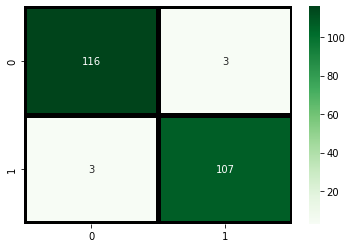

In [ ]:
print("\n Algortima Naive Bayes \n")
print(sns.heatmap(confusion_matrix(Y_test,predNB),annot=True,fmt='g',cmap='Greens',linecolor='black',linewidths=4,))


 Algortima Naive Regresi Logisitik 



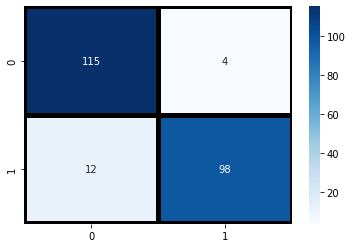

In [ ]:
print("\n Algortima Naive Regresi Logisitik \n")
sns.heatmap(confusion_matrix(Y_test,predLR),annot=True,fmt='g',cmap='Blues',linecolor='black',linewidths=4)


 Algortima Random Forest Clasiifer 



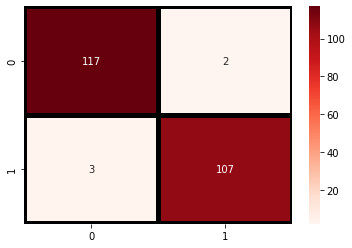

In [ ]:
print("\n Algortima Random Forest Clasiifer \n")
sns.heatmap(confusion_matrix(Y_test,predRF),annot=True,fmt='g',cmap='Reds',linecolor='black',linewidths=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 38.9 MB/s 
  Created wheel for jcopml: filename=jcopml-1.2.0-py2.py3-none-any.whl size=32032 sha256=7fa7a86132b298bce33e63fb7c5f3ed7c447e7140340a7e721a4a2056117862f
  Stored in directory: /root/.cache/pip/wheels/da/9c/84/0670d7771fe7a5383c1ee4506df03e664d1f9abeb54db10e1d
Successfully built jcopml


In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from jcopml.pipeline import num_pipe, cat_pipe
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
sw_indo = stopwords.words("indonesian") + list(punctuation)
rsp.rf_params

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'algo__n_estimators': Integer(low=100, high=200),
 'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20)}

In [ ]:
X = df['Teks']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((913,), (229,), (913,), (229,))

In [ ]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)


{'algo__max_depth': 22, 'algo__max_features': 0.1185260448662222, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 187}
0.9485213581599123 0.9145707506471096 0.9301310043668122


**SANITY CHECK**

In [ ]:
text = ["Cash back bonus deposit 1% dengan minimal deposit 1juta berlaku kelipatan hingga 10juta. Khusus hari ini saja. Download PAYPOIN"]

In [ ]:
print(model.predict(text))
print(model.predict_proba(text))

[1]
[[0.48838605 0.51161395]]


In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from jcopml.pipeline import num_pipe, cat_pipe
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
sw_indo = stopwords.words("indonesian") + list(punctuation)
rsp.e

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: ignored